# Exercise 3: Generating homology groups from pseudo-landmark data

**Author**: John Hodge

In this third exercise we will review one of the downstream applications of our batch plm data we generated in our previous exercise by generating de novo homology groups.  It should be noted that this method, while incredibly powerful, has some prior assumptions in its usage.  To drive home the point, THIS METHOD IS DESIGNED TO ESTIMATE GROUPS BY MAKING ASSUMPTIONS ABOUT BIOLOGICAL HOMOLOGY (i.e. not persistent homology which is an completely different analytical method!).

Ideally, when image data of sufficient quality is presented to this workflow homology groups could even be inferred to be orthologous to one another although, similar to (phylo)genetic clustering methods, you get out what you put in and so this may be subjective based on your dataset.  That being said, there are concievably two datasets where this homology grouping set is applicable:

1) Linking landmarks through time series image data to survey growth and development of independent structures through time.

2) Linking landmarks between comparable static materials either between individuals or genotypes for comparing variability of these landmarks in analogous organismal datasets (i.e. leaves with readily apparent lobes, awns, or sinuses, as one example).

Given our homology grouping workflow was designed for the former dataset we will work through a demonstration of how this works and how best to go about performing this analysis in an idealized dataset.  Let's get started by importing what we need...


In [1]:
%matplotlib widget
# Change inline to widget for interactive plots
from plantcv import plantcv as pcv
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from skimage import img_as_ubyte

In [2]:
# PlantCV adjustable global parameters
pcv.params.debug = "plot"
pcv.params.text_size = 20
pcv.params.text_thickness = 10
pcv.params.line_thickness = 14
# Adjust plot sizes
pcv.params.dpi = 125

In [3]:
win = 25
thresh = 90

path = './imgs'
days = range(10, 14)
name_prefix = 'B100_rep1_d'

Before we get rolling though we'll have you enter in a output file path to save some graphs this workflow will generate which will be appended to our output prefix.


In [4]:
outpath = './output'
os.makedirs(outpath, exist_ok=True)
outfile_prefix = os.path.join(outpath, 'B100_d10_d11_test')

Now that we have what we need to rerun the script we walked through in the previous exercise let's run through the code block we covered last time (with a few modifications to the outputs) and then think about how best to move forward with our landmark outputs.


/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:270: RuntimeWarning: invalid value encountered in true_divide
  r = red.astype(np.float32) / total
/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:271: RuntimeWarning: invalid value encountered in true_divide
  g = green.astype(np.float32) / total
/Users/nfahlgren/GitHub/plantcv/plantcv/plantcv/spectral_index/spectral_index.py:272: RuntimeWarning: invalid value encountered in true_divide
  b = blue.astype(np.float32) / total


Fusing contour edges
route C
Landmark site: 1672, Start site: 1650, Term. site: 18
Landmark point indices: [1672]
Starting site indices: [1650]
Termination site indices: [18]
route C
Landmark site: 312, Start site: 289, Term. site: 332
Landmark point indices: [1672, 312]
Starting site indices: [1650, 289]
Termination site indices: [18, 332]
route C
Landmark site: 525, Start site: 501, Term. site: 549
Landmark point indices: [1672, 312, 525]
Starting site indices: [1650, 289, 501]
Termination site indices: [18, 332, 549]
route C
Landmark site: 832, Start site: 817, Term. site: 840
Landmark point indices: [1672, 312, 525, 832]
Starting site indices: [1650, 289, 501, 817]
Termination site indices: [18, 332, 549, 840]
route C
Landmark site: 917, Start site: 893, Term. site: 940
Landmark point indices: [1672, 312, 525, 832, 917]
Starting site indices: [1650, 289, 501, 817, 893]
Termination site indices: [18, 332, 549, 840, 940]
route C
Landmark site: 1038, Start site: 1004, Term. site: 1061

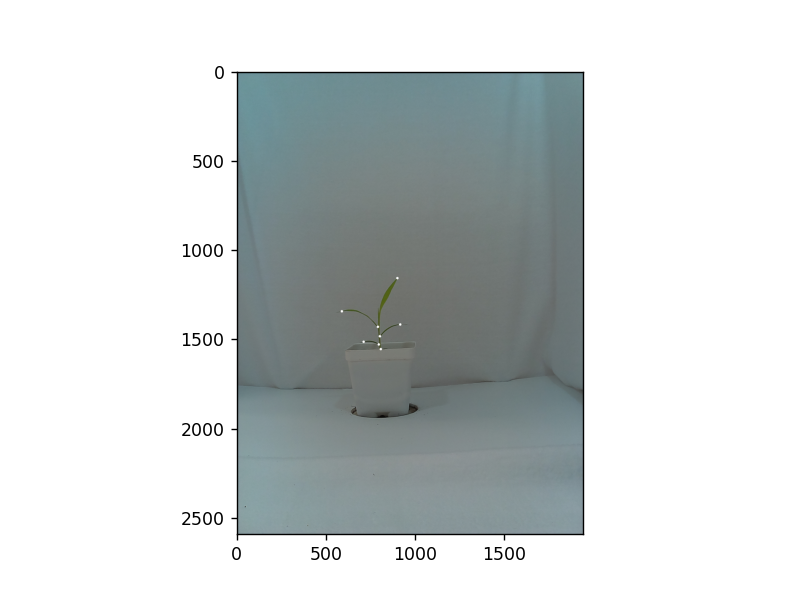

    landmark number: 8


Fusing contour edges
route C
Landmark site: 1947, Start site: 1925, Term. site: 17
Landmark point indices: [1947]
Starting site indices: [1925]
Termination site indices: [17]
route C
Landmark site: 258, Start site: 234, Term. site: 282
Landmark point indices: [1947, 258]
Starting site indices: [1925, 234]
Termination site indices: [17, 282]
route C
Landmark site: 396, Start site: 373, Term. site: 420
Landmark point indices: [1947, 258, 396]
Starting site indices: [1925, 234, 373]
Termination site indices: [17, 282, 420]
route C
Landmark site: 581, Start site: 557, Term. site: 602
Landmark point indices: [1947, 258, 396, 581]
Starting site indices: [1925, 234, 373, 557]
Termination site indices: [17, 282, 420, 602]
route C
Landmark site: 792, Start site: 770, Term. site: 815
Landmark point indices: [1947, 258, 396, 581, 792]
Starting site indices: [1925, 234, 373, 557, 770]
Termination site indices: [17, 282, 420, 602, 815]
route C
Landmark site: 1097, Start site: 1082, Term. site: 1111

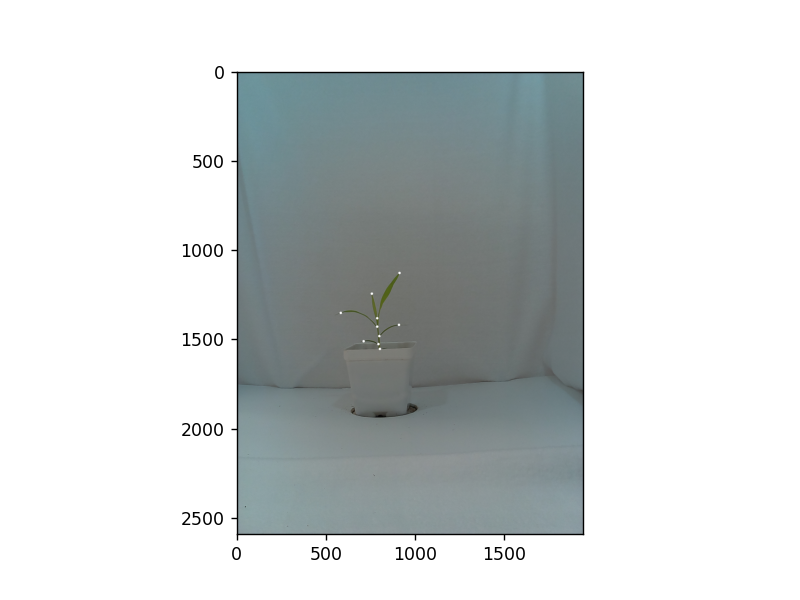

    landmark number: 10


Fusing contour edges
route C
Landmark site: 0, Start site: 1678, Term. site: 24
Landmark point indices: [0]
Starting site indices: [1678]
Termination site indices: [24]
route C
Landmark site: 272, Start site: 248, Term. site: 291
Landmark point indices: [0, 272]
Starting site indices: [1678, 248]
Termination site indices: [24, 291]
route C
Landmark site: 488, Start site: 467, Term. site: 510
Landmark point indices: [0, 272, 488]
Starting site indices: [1678, 248, 467]
Termination site indices: [24, 291, 510]
route C
Landmark site: 797, Start site: 780, Term. site: 809
Landmark point indices: [0, 272, 488, 797]
Starting site indices: [1678, 248, 467, 780]
Termination site indices: [24, 291, 510, 809]
route C
Landmark site: 876, Start site: 852, Term. site: 900
Landmark point indices: [0, 272, 488, 797, 876]
Starting site indices: [1678, 248, 467, 780, 852]
Termination site indices: [24, 291, 510, 809, 900]
route C
Landmark site: 984, Start site: 955, Term. site: 1007
Landmark point indi

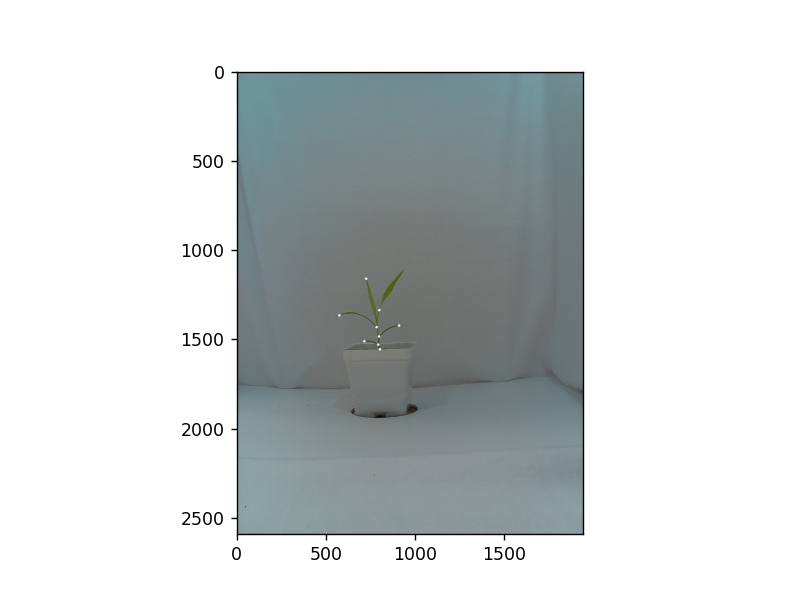

    landmark number: 9


Fusing contour edges
route C
Landmark site: 0, Start site: 2127, Term. site: 21
Landmark point indices: [0]
Starting site indices: [2127]
Termination site indices: [21]
route C
Landmark site: 341, Start site: 318, Term. site: 361
Landmark point indices: [0, 341]
Starting site indices: [2127, 318]
Termination site indices: [21, 361]
route C
Landmark site: 550, Start site: 529, Term. site: 573
Landmark point indices: [0, 341, 550]
Starting site indices: [2127, 318, 529]
Termination site indices: [21, 361, 573]
route C
Landmark site: 886, Start site: 855, Term. site: 910
Landmark point indices: [0, 341, 550, 886]
Starting site indices: [2127, 318, 529, 855]
Termination site indices: [21, 361, 573, 910]
route C
Landmark site: 1071, Start site: 1048, Term. site: 1095
Landmark point indices: [0, 341, 550, 886, 1071]
Starting site indices: [2127, 318, 529, 855, 1048]
Termination site indices: [21, 361, 573, 910, 1095]
route C
Landmark site: 1191, Start site: 1176, Term. site: 1211
Landmark po

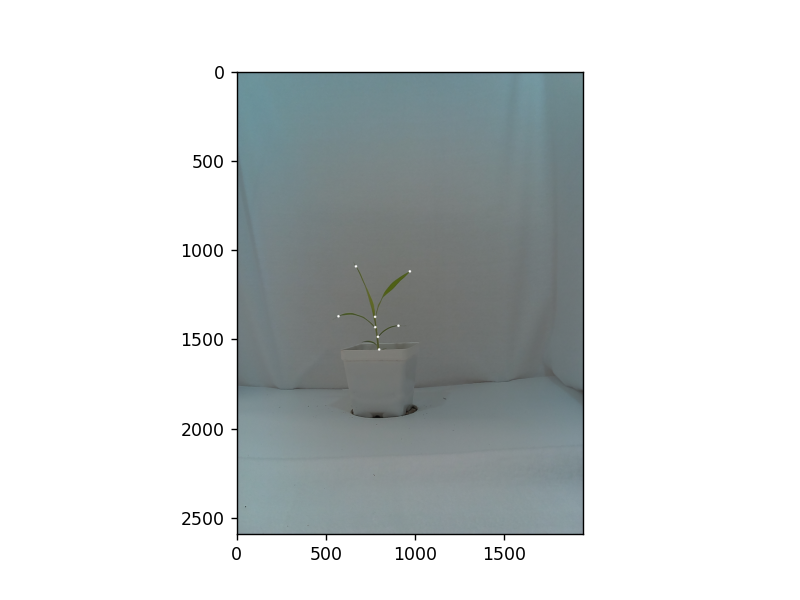

    landmark number: 8


In [5]:
landmark_output=[['group', 'plmname', 'filename', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio']]
for day in days:
    # Turn off debugging outputs for most steps to avoid a huge amount of output
    pcv.params.debug = None
    # 1. Reading our image into the environment
    img, imgpath, imgname = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))

    # 2. Convert the RGB image into an Excess Green Index image
    egi = pcv.spectral_index.egi(rgb_img=img)

    # 3. Threshold the EGI image to create a binary mask
    mask = pcv.threshold.binary(gray_img=img_as_ubyte(egi.array_data), threshold=40)
    
    # 6. Find largest contour of subject (outer boundary of subject)
    roi = pcv.roi.rectangle(img=img, x=500, y=500, h=1100, w=800)
    kept_mask = pcv.roi.filter(mask=mask, roi=roi, roi_type="largest")

    # 7. Extracting pseudo-landmarks from the plant contours
    # Turn debugging back on for acute
    pcv.params.debug = "plot"
    homolog_pts, homolog_start, homolog_stop, homolog_cc, chain, verbose = pcv.homology.acute(img=img, mask=kept_mask,
                                                                                              win=win, threshold=thresh)
    print(f'    landmark number: {len(homolog_pts)}')

    for h in range(0, len(homolog_pts)):
        landmark_output.append([None, f"{name_prefix}{day}_plm{h+1}", f"{name_prefix}{day}", homolog_pts[h][0][0], homolog_pts[h][0][1], 
                                homolog_start[h][0][0], homolog_start[h][0][1], homolog_stop[h][0][0], homolog_stop[h][0][1], homolog_cc[h],])

# # Convert out output to a pandas dataframe for ease of use hereafter...
landmark_pandas = pd.DataFrame(landmark_output[1:len(landmark_output)], columns=landmark_output[0][0:11])

Now that we have our analyses run again let's have another look at data to think about how we'll proceed...

In [6]:
landmark_pandas.head()

group             plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0  None  B100_rep1_d10_plm1  B100_rep1_d10    898   1156   888  1178   881   
1  None  B100_rep1_d10_plm2  B100_rep1_d10    789   1429   791  1406   775   
2  None  B100_rep1_d10_plm3  B100_rep1_d10    587   1342   610  1336   611   
3  None  B100_rep1_d10_plm4  B100_rep1_d10    794   1528   797  1513   786   
4  None  B100_rep1_d10_plm5  B100_rep1_d10    709   1513   733  1509   732   

   TS_y  CC_ratio  
0  1173     255.0  
1  1411       0.0  
2  1339     255.0  
3  1522       0.0  
4  1511     255.0

Thus far, we've largely been considering this data as a table where we really only cared about our X-Y coordinates that describe our plms. However, when we think about this matrix beyond the the filename and plm x/y columns we can see that we really have quite a few extra dimensions which add some context to our data.  These added dimensions were originally deemed to be potentially useful for generating a rich multivariate dataset to to pull these plms together into homology groups.  `space` no longer is seen as a required component of this pipeline, however, given that analyses seem to only produce negligibly better results with it's inclusion.  That being said, this approach does produce some novel types of metadata which could have alternative applications so we'll at least discuss what `space` is doing here in it's original context, even if we gloss over it in tutorial 4. You may have also noticed we now have a new empty column we've added that didn't exist before called 'group' but for now we'll just ignore it. 

To begin, let's take our initial outputs from Acute and expand them into our expanded multivariate space to use for homology grouping.


In [7]:
day = 10
group_iter = 1

filenames = landmark_pandas.loc[:,['filename']].values
cur_plms = landmark_pandas[filenames==name_prefix+str(day)]
cur_plms = cur_plms.append(landmark_pandas[filenames==name_prefix+str(day+1)])

cur_plms = pcv.homology.space(cur_plms, include_bound_dist=True, include_centroid_dist=True, include_orient_angles=True)

  group             plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0  None  B100_rep1_d10_plm1  B100_rep1_d10    898   1156   888  1178   881   
1  None  B100_rep1_d10_plm2  B100_rep1_d10    789   1429   791  1406   775   
2  None  B100_rep1_d10_plm3  B100_rep1_d10    587   1342   610  1336   611   
3  None  B100_rep1_d10_plm4  B100_rep1_d10    794   1528   797  1513   786   
4  None  B100_rep1_d10_plm5  B100_rep1_d10    709   1513   733  1509   732   

   TS_y  CC_ratio  bot_left_dist  bot_right_dist  top_left_dist  \
0  1173     255.0     508.815291      398.321478     318.323735   
1  1411       0.0     242.670559      176.776695     366.698786   
2  1339     255.0     212.084889      389.708866     215.083705   
3  1522       0.0     214.580987      122.784364     454.059467   
4  1511     255.0     134.406101      209.059800     406.669399   

   top_right_dist  centroid_dist  orientation  centroid_orientation  
0       33.120990     281.149426  -145.304846            1

/var/folders/w8/r9_f9vbx64x2_6pgqn8mdm9r0000gn/T/ipykernel_53625/474610241.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cur_plms = cur_plms.append(landmark_pandas[filenames==name_prefix+str(day+1)])


Now as we look at our outputs from the `space` function we can see that there is clearly quite a bit of extra information we've just added. Let's breakdown what each of these new elements are item by item just to understand what new information we've generated.  

To begin we can consider five distance elements, 'bot_left_dist', 'bot_right_dist', 'top_left_dist', 'top_right_dist', and 'centroid_dist'.  These new values are distances between the plms representing each row and the bounding box corners capturing our current image pairs plms. In addition, we also calculate a centroid point for our current image pair to generate a distance from the 'center of gravity' for these paired plms.  Given we've largely focused on spatial positions alone distance measures, while analogous in terms of being pixel measures, help by giving us some added indication as to where in space our landmarks fall compared to one another.  

Beyond these distance measures we have two other elements, 'orientation' and 'centroid_orientation'.  As could be anticipated from these names these elements are both providing some additional information about the direction of the plms in space as opposed to raw distance measures, however, they are accomplishing this in very different ways.  The 'orientation' measures are based purely on the plm, SS, TS coordinates in which the midpoint between SS and TS are calculated and this midpoint is then used to drive a line towards the plm to generate a slope. Following the generation of a slope an angle can be generated using the formula:
   
    angle = arctan(slope)*(180/pi)

By contrast, the 'centroid_orientation' begins at the centroid and drives a line towards the plm to generate a slope then uses a similar formula to what was described above in order to calculate an angle of orientation.  

Now that we have a multivariate dataset that is rich in context for comparisons to be made we can begin to determine how similar or distant they are to one another through time. For the initial steps we will use two approaches, PCA which is extremely useful in maximizing the amount of variation while reducing dimensionality (key in a dataset such as ours) followed by clustering approaches used to link nearest neighbors (which will help us stitch our plms together through time).

Let's begin with our PCA approach which will be found within our `starscape` function...


Eigenvalues:  [7.73952293 4.73476503 1.50594728 0.34788241] 


Var. Explained:  [0.52211067 0.31940875 0.10159168 0.02346826] 


Cumul. Var. Explained:  [0.52211067 0.84151943 0.94311111 0.96657937] 


3  components sufficiently informative


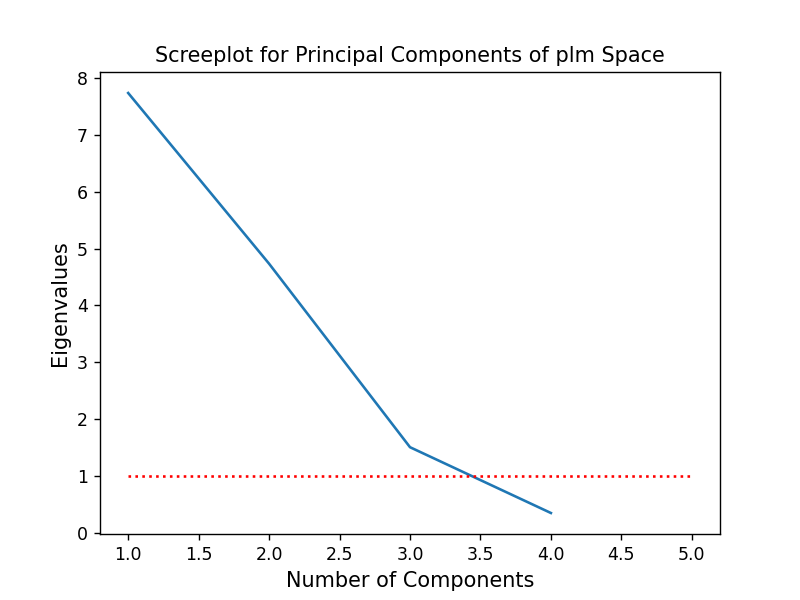

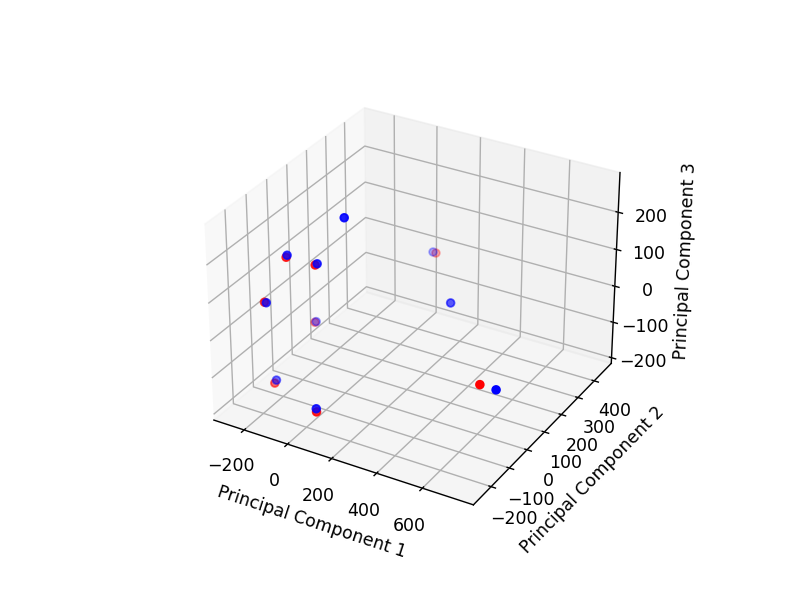

In [8]:
groupA = f"{name_prefix}{day}"
groupB = f"{name_prefix}{day+1}"
finalDf, eigvals, loadings = pcv.homology.starscape(cur_plms, groupA, groupB, outfile_prefix)

In [9]:
finalDf.head()

plmname       filename         PC1         PC2         PC3
0  B100_rep1_d10_plm1  B100_rep1_d10  672.587702  -82.201453  -28.299393
1  B100_rep1_d10_plm2  B100_rep1_d10  -68.474511  -64.309000  149.222980
2  B100_rep1_d10_plm3  B100_rep1_d10   46.219680  448.281891  -12.964128
3  B100_rep1_d10_plm4  B100_rep1_d10 -248.093268 -126.950751   46.287019
4  B100_rep1_d10_plm5  B100_rep1_d10 -267.889055  143.157742 -130.912041

Using the StarScape function above a principal component analysis is undertaken to reduce the dimensionality of our multivariate space to a minimal number of maximally informative dimensions (3 in this example) while also providing some helpful outputs for consideration as we perform our later homology grouping with Constella.  When running StarScape in debugging mode as we have it should be noted that various attributes of the PCA which was performed such as the eigenvalues and eigenvectors will be printed as outputs.

The first of the graphical outputs that StarScape produces is a scree plot.  The eigenvalues plotted in this graph are used to dynamically define the number of components required for explaining the relationship of our plms groupings within multivariate space.  As we can observe in this scree plot, as can be expected with most PCA analyses, that the vast majority of our variance can be explained with the first few dimensions which are then stored as an output dataframe. The number of output components can be defined by the user although it is recommended to have a strong reasoning from deviating from the default setting built within this script. 

Following the identification of our number of informative components we can then observe our 'starscape' as two overlaid scatter plots reflecting the first three PC dimensions.  In this graph we can also observe that our two perspectives in time between this image neighbor pair are color coded allowing us to see that in fact several of these plms appear to be almost perfectly overlapping through time suggesting they likely represent the same structure. This neighbor pair was purposefully chosen for this demonstration as we can see day 11 has 2 points which appear to lack partners.  This is due to the fact that a new leaf was exerted in this frame resulting in two new plms representing a leaf tip and ligule.  

This PC space will provide a perfect test case for our demonstrating the methodology of our homology grouping script Constella...  


18 plms to group


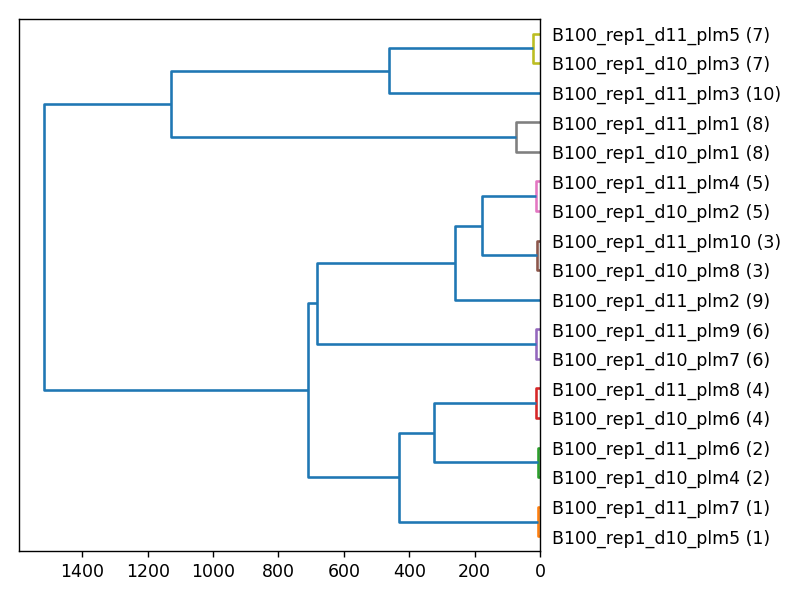

In [10]:
cur_plms, group_iter = pcv.homology.constella(cur_plms=cur_plms, pc_starscape=finalDf, group_iter=group_iter, outfile_prefix=outfile_prefix)

Although we initially only see the hierarchical cluster used by Constella shown as a dendrogram graphic quite a bit has actually happened when we ran this function in order to generate our homology groupings!

Let's start by thinking about what our hierarchical cluster of our neighboring frames looks like in this graphic.  We can see that for the vast majority of our plms there appear to be paired points which correspond to a plm from each frame (given the 3D plot from our starscape plot this probably isn't much of a surprise!).  Given this initial finding it would almost seem at first glance that focusing on groups consisting of two plms would be sufficient, however, there is some nuance to plm datasets given they are dynamically describing growth as it occurs.  For example, we can see at least one case in which clusters of three plms form within this dendrogram, and another more complex situation in which day 11 plm 2 becomes a rogue point in the proximity of a pair of homology groups.  In each of these cases one of the emergent plms that just appeared in the day 11 frame is clustering around its nearest cluster pair in the starscape output.  Even when they are no longer emergent it is often common for these new points to rapidly migrate for several days before reaching stationarity as the structure they represent grows and eventually arrests its development.  As such we need a fairly robust means of describing structures which are more or less non-moving while also being able to dynamically characterize noisier subcomponents of the dataset which may be undertaking fairly rapid change for a transient period of time.  Ultimately Constella is designed around the concept for describing groups as duets which are adjacent to one another in time.  Let's use a series of examples to grasp this concept:

## Constella homology grouping example (i.e. identifying duets, quartets, and rogues)

1)
                                        
                     --- Day 11 Group 1   |   As we look at this initial illustration of a dendrogram it is clear
    ----------------|                     |   that there is a clear group which we refer to as a 'duet' which will
                     --- Day 12 Group 1   |   share a group ID serial number during Constella de novo assignment.

2)

                     --- Day 11 Group 1   |  As development continues things often become more complicated with
                ----|                     |  novel structures begin to appear and lacking partners due to their 
               |     --- Day 12 Group 1   |  recent appearance they often cluster around a known duet. These 
    -----------|                          |  points which appear to lack any notable partner to pair with are
                -------- Day 12 Group 2   |  referred to as rogues and are often given their own group ID number.
                
3) 

                     --- Day 12 Group 1   |  Development continues and further evidence begins to accumuluate for 
                ----|                     |  group 2 with a partner now appearing in day 13.  However, when growth
               |     --- Day 13 Group 1   |  is rapidly occuring duets sometimes have difficulty manifesting due 
             --|                          |  to rapid changes between day 12 and 13 for group 2. This leads to a
            |  |                          |  grade luck structure as shown here we refer to as a quartet which is
    --------|   -------- Day 12 Group 2   |  merely an artifact of a similar problem known as 'long branch attract
            |                             |  -ion' in phylyogenetics. So long as a grade of 2 plms exactly can be
             ----------- Day 13 Group 2   |  resolved a quartet can be used to assign the identity of group 2.

4)

                     --- Day 13 Group 1   |  As development continues and the rapid growth that gave rise to the   
         -----------|                     |  quartet structure abates we can begin to clearly resolve duets for
        |            --- Day 14 Group 1   |  groups 1 and 2.  These structured duets often make up the bulk of 
    ----|                                 |  our dendrogram results as shown above which, like figure (1) can 
        |        ------- Day 13 Group 2   |  readily be used to assign group identities to duets.
         -------|
                 ------- Day 14 Group 2
                     
In the manner described above, Constella operates through iteratively assigning points identities through an expanding nearest neighbor homology grouping scheme which is superfically similar to neighbor joining.  Although these steps are critical to defining how Constella weighs homology, as important is how Constella chooses to define new serial number identities vs. perserving existing ones:  

## Constella groups: seeding vs. linking

Now that we have covered the basics of how Constella detects groups it is worth taking a moment to discuss how Constella assigns names.  There are generally two strategies which largely are based on if prior encounters with plms that are being grouped through image series/time series data has occurred.  When we first began this notebook we assigned the variable 'group_iter' to 1 which serves as our counter variable for assigning serial numbers to each homology group as Constella detects them.  When a novel group is detected, be it a duet, graded pair in a quartet, or rogue plms Constella 'seeds' these groups by assigning them the current group_iter number and iterating the counter by one.  By contrast, some groups should be expected to appear for several images in a row, especially in time series data, and in these cases an identity is already established for one of the current pair.  In these cases 'linking' occurs in which the known identity for one of the pair is passed on to the yet to be defined member so that the identity of this group is allowed to be carried through time or across an image series of analogous data. 

Given this naming strategy of assigning numbers as identities it is probably worth noting that although Constella is designed for use in homology-based approaches it operates in an analogous sphere to de novo genome assemblers in that although both can identify probable relationships (either as genomic scaffolds or plm linkage groups) it makes no attempt to assign known identity to these groups akin to changing scaffold identities to that of known chromosomes for a given genome.  This step of defining plm groups as a specific leaf tip, a leaf axil/ligule, or a floral structure such as an inflorescence apex is a post analysis step to be undertaken by an end user.

#### Where we left off...

Now that we have a thorough understanding of exactly what we did by running running Constella it would probably be good to see how well it did wouldn't it? Let's have a look!


In [11]:
cur_plms

group              plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0      8   B100_rep1_d10_plm1  B100_rep1_d10    898   1156   888  1178   881   
1      5   B100_rep1_d10_plm2  B100_rep1_d10    789   1429   791  1406   775   
2      7   B100_rep1_d10_plm3  B100_rep1_d10    587   1342   610  1336   611   
3      2   B100_rep1_d10_plm4  B100_rep1_d10    794   1528   797  1513   786   
4      1   B100_rep1_d10_plm5  B100_rep1_d10    709   1513   733  1509   732   
5      4   B100_rep1_d10_plm6  B100_rep1_d10    805   1554   796  1531   803   
6      6   B100_rep1_d10_plm7  B100_rep1_d10    914   1416   891  1421   891   
7      3   B100_rep1_d10_plm8  B100_rep1_d10    800   1482   814  1464   797   
8      8   B100_rep1_d11_plm1  B100_rep1_d11    910   1127   901  1149   893   
9      9   B100_rep1_d11_plm2  B100_rep1_d11    785   1381   792  1358   783   
10    10   B100_rep1_d11_plm3  B100_rep1_d11    755   1243   762  1266   756   
11     5   B100_rep1_d11_plm4  B100_rep1_d11    785   1428   783  1404   770   
12     7   B100_rep1_d11_plm5  B100_rep1_d11    581   1351   603  1342   604   
13     2   B100_rep1_d11_plm6  B100_rep1_d11    792   1526   792  1511   780   
14     1   B100_rep1_d11_plm7  B100_rep1_d11    709   1510   733  1506   732   
15     4   B100_rep1_d11_plm8  B100_rep1_d11    800   1553   793  1530   800   
16     6   B100_rep1_d11_plm9  B100_rep1_d11    907   1418   884  1424   883   
17     3  B100_rep1_d11_plm10  B100_rep1_d11    797   1481   809  1466   793   

    TS_y  CC_ratio  bot_left_dist  bot_right_dist  top_left_dist  \
0   1173     255.0     508.815291      398.321478     318.323735   
1   1411       0.0     242.670559      176.776695     366.698786   
2   1339     255.0     212.084889      389.708866     215.083705   
3   1522       0.0     214.580987      122.784364     454.059467   
4   1511     255.0     134.406101      209.059800     406.669399   
5   1531     255.0     224.000000      109.000000     482.187723   
6   1419     255.0     360.462203      138.000000     440.919494   
7   1459       0.0     230.531993      134.833230     417.116291   
8   1144     255.0     539.045453      427.018735     329.000000   
9   1357       0.0     267.478971      215.800834     325.779066   
10  1267     255.0     356.366384      349.287847     209.121974   
11  1410       0.0     239.774894      180.324707     363.616556   
12  1346     255.0     203.000000      389.997436     224.000000   
13  1519       0.0     212.849712      125.171882     451.355736   
14  1509     255.0     135.351395      209.668786     403.822981   
15  1530     255.0     219.002283      114.004386     478.995825   
16  1421     255.0     353.230803      136.180028     436.986270   
17  1460       0.0     228.002193      137.905765     414.695069   

    top_right_dist  centroid_dist  orientation  centroid_orientation  
0        33.120990     281.149426  -145.304846            156.078895  
1       326.847059      16.763055   -16.313852             17.354025  
2       391.348949     209.403916   100.840305            -70.180528  
3       418.570185     115.433964   -13.392498              4.969741  
4       437.059493     125.000000    97.275005           -143.130102  
5       440.692637     142.555252   -13.448615              8.471145  
6       289.000000     130.034611   -99.865807             88.678024  
7       372.855200      70.830784   164.981639             13.055247  
8         4.000000     312.525199  -146.309932            156.223657  
9       284.880677      32.015621   173.927544            178.210089  
10      196.817174     172.455791     9.659893             -9.680799  
11      327.478244      15.033296   -22.036227              3.814075  
12      401.329042     212.256920   107.281498            -73.016348  
13      417.234946     113.282832   -28.610460              4.049582  
14      434.412247     122.613213    96.072456           -142.288952  
15      440.989796     140.911320    -8.652542       

It definitely appears as if we have paired groups between the majority of our plms across days 10 and 11! The only exceptions appear to be two plms specific to day 11 which are assigned to groups 9 and 10.  It would probably be worth seeing how these stack up on our original data (i.e. the images) since these data tables are often aren't the easiest to process.  With that being said, let's superimpose these groups onto the plms coordinates on each frame to see if they are in agreement.


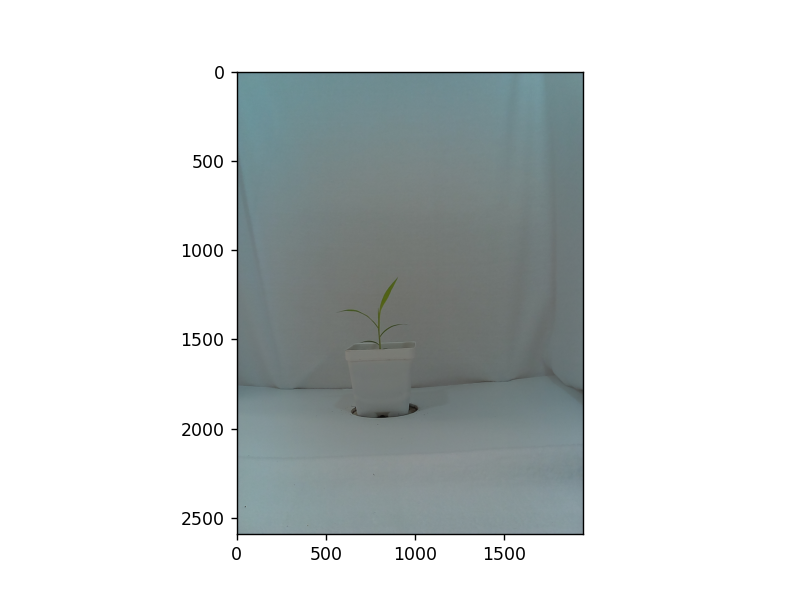

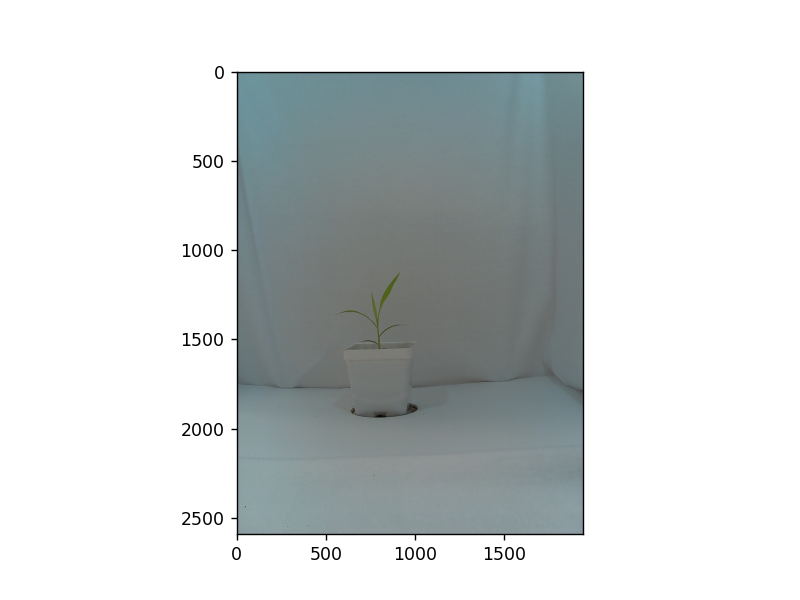

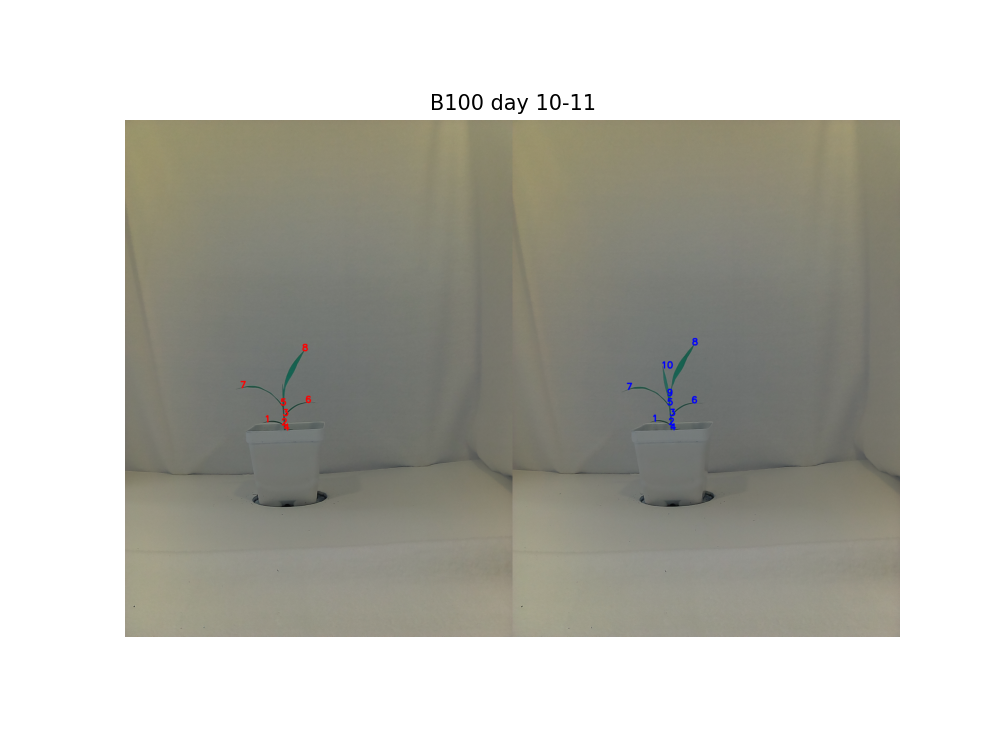

In [12]:
img1, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))

for p in range(0, cur_plms.shape[0]):
    if f"{name_prefix}{day}" in cur_plms.at[p, 'plmname']:        
        cv2.putText(img1, str(cur_plms.at[p, 'group']), 
                    (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                    cv2.FONT_ITALIC, 1.5, (255,0,0), 6)

img2, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day + 1}.jpg"))

for p in range(0, cur_plms.shape[0]):
    if f"{name_prefix}{day + 1}" in cur_plms.at[p, 'plmname']:        
        cv2.putText(img2, str(cur_plms.at[p, 'group']), 
                    (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                    cv2.FONT_ITALIC, 1.5, (0,0,255), 6)
  
img_neighbors = cv2.hconcat((img1, img2))

plm_groups_fig=plt.figure(figsize=(8, 6))
plm_groups_fig=plt.imshow(img_neighbors)
plm_groups_fig=plt.xscale('linear')
plm_groups_fig=plt.axis('off')
plm_groups_fig=plt.title(f'B100 day {day}-{day + 1}')
plt.show(plm_groups_fig)

Looking at our groups overlaid against the leaf tips and ligules it seems like our attempts at forming homology groups through our workflow was a success! And note how our ligule and leaf tip plms corresponding to the emergent leaf in day 11 are represented by groups '9' and '10' which didn't appear in our first frame, seeding new groups as novel structures appear is clearly working as advertised as well! 

Now that we understand how homology grouping works through the use of our Space >>> StarScape >>> Constella workflow we will use our final exercise to expand on what we've learned and apply it to store time series data and utilize groundtruthed plms of QC steps during pipeline development.
